In [ ]:
#Uploading data and libaries

In [1]:
import pandas as pd
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, PowerTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn import set_config
set_config(transform_output="pandas")
import numpy as np

In [ ]:
url = "https://drive.google.com/file/d/14R3mBduBAPH-lllDBinQPgN4o6weTXft/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
songs_5000= pd.read_csv(path)
songs_5000

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


# Data Exploration

## Data Cleaning

In [ ]:
songs_5000_df= songs_5000.copy()
songs_5000_df

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
3,3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
4,4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...


In [ ]:
print(songs_5000_df.columns)

Index(['Unnamed: 0',
       'name                                                                                                                                                                             ',
       'artist                                          ', 'danceability ',
       'energy   ', 'key ', 'loudness ', 'mode ', 'speechiness ',
       'acousticness ', 'instrumentalness ', 'liveness ', 'valence ',
       'tempo   ', 'type ', 'duration_ms ', 'time_signature ',
       'id                     ', 'html'],
      dtype='object')


In [ ]:
songs_5000_df.columns = songs_5000_df.columns.str.strip() #removing trailing spaces in columns
print(songs_5000_df.columns)

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')


In [ ]:
songs_5000_df. sample(50)#sanitycheck

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
431,431,Bromes ...,Les Sueques,0.608,0.90300,2,-4.805,1,0.1550,0.011400,0.787000,0.2030,0.5250,146.145,,158773,4,6urCNDKBFK8oIimmPfpQ2r,https://open.spotify.com/track/6urCNDKBFK8oIim...
3998,3998,Brutal Warfare ...,Mortification,0.288,0.95300,7,-8.914,1,0.0533,0.000012,0.657000,0.3190,0.5290,104.219,,238333,4,6Ly8YRAmHhn94hjtCPX9XX,https://open.spotify.com/track/6Ly8YRAmHhn94hj...
518,518,To My Love ...,Bomba Estéreo,0.426,0.70500,7,-3.552,1,0.0411,0.067600,0.035500,0.0998,0.2920,109.977,,239547,4,6z1VtU0MCGo666iKiajfhp,https://open.spotify.com/track/6z1VtU0MCGo666i...
1866,1866,DNA ...,Amy Dickson,0.120,0.01950,4,-24.268,1,0.0494,0.992000,0.895000,0.0915,0.0397,70.749,,275587,1,6wgBdqFfalobMk33lbND2s,https://open.spotify.com/track/6wgBdqFfalobMk3...
312,312,Ordinary Girls ...,English Singles,0.205,0.86900,0,-7.433,1,0.0445,0.000478,0.000000,0.1090,0.7720,176.047,,189263,4,66DIOrwFXTFrcHxpdNvWHb,https://open.spotify.com/track/66DIOrwFXTFrcHx...
4162,4162,Unchallenged Hate ...,Napalm Death,0.238,0.79200,2,-13.759,1,0.0502,0.000002,0.913000,0.2000,0.5420,104.052,,127800,4,69kv8axFs4ibohpVQENLeP,https://open.spotify.com/track/69kv8axFs4ibohp...
1641,1641,Because of You ...,Kelly Clarkson,0.583,0.58000,5,-5.395,0,0.0319,0.243000,0.000000,0.1980,0.1190,139.820,,220373,4,1258tSoXDDa43uqT75r5N0,https://open.spotify.com/track/1258tSoXDDa43uq...
792,792,That's Amore ...,Dean Martin,0.407,0.17000,10,-13.409,1,0.0341,0.760000,0.000000,0.0737,0.5770,124.047,,188267,4,3x6wVKXfCm85Pw7gYo0rqq,https://open.spotify.com/track/3x6wVKXfCm85Pw7...
2011,2011,And We Will Shine ...,Dirk Maassen,0.223,0.09780,5,-20.096,1,0.0516,0.989000,0.932000,0.1050,0.1300,73.135,,235935,5,5IcJNid5ZGq26rKJBA36zn,https://open.spotify.com/track/5IcJNid5ZGq26rK...
328,328,Kana Kapila ...,Cousins,0.659,0.64900,0,-15.884,1,0.0667,0.469000,0.446000,0.1280,0.9660,92.458,,122160,4,2JXzKmttRH5Hj1Q587ParV,https://open.spotify.com/track/2JXzKmttRH5Hj1Q...


In [ ]:
songs_5000_df.info() #understaing structure of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5235 entries, 0 to 5234
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5235 non-null   int64  
 1   name              5235 non-null   object 
 2   artist            5235 non-null   object 
 3   danceability      5235 non-null   float64
 4   energy            5235 non-null   float64
 5   key               5235 non-null   int64  
 6   loudness          5235 non-null   float64
 7   mode              5235 non-null   int64  
 8   speechiness       5235 non-null   float64
 9   acousticness      5235 non-null   float64
 10  instrumentalness  5235 non-null   float64
 11  liveness          5235 non-null   float64
 12  valence           5235 non-null   float64
 13  tempo             5235 non-null   float64
 14  type              5235 non-null   object 
 15  duration_ms       5235 non-null   int64  
 16  time_signature    5235 non-null   int64  


In [ ]:
songs_5000_df["artist_song"] = songs_5000_df["artist"] + " " + songs_5000_df['name']#merging two columns for easy readabilty
songs_5000_df

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,artist_song
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,Gilberto Gil ...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,Antônio Carlos Jobim ...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,Martinho Da Vila ...
3,3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...,Chico César ...
4,4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...,Kurt Elling ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...,Pyotr Ilyich Tchaikovsky ...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...,Tristan Murail ...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...,Arnold Schoenberg ...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...,Antonín Dvořák ...


In [ ]:
songs_5000_df['type']

,type
0,
1,
2,
3,
4,
...,...
5230,
5231,
5232,
5233,


In [ ]:
songs_5000_df.loc[ 1, 'time_signature']

np.int64(4)

In [ ]:
#Droping irrelevent columns
to_drop = ["name", "artist", "id", "html", "type", "Unnamed: 0"	] #type seems like an index number, so duplicated we did not need. Keep other numneric columns as they also show a distinct song features.
songs_5000_df= songs_5000_df.drop(columns=to_drop)
songs_5000_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,artist_song
0,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4,Gilberto Gil ...
1,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4,Antônio Carlos Jobim ...
2,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4,Martinho Da Vila ...
3,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4,Chico César ...
4,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4,Kurt Elling ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4,Pyotr Ilyich Tchaikovsky ...
5231,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4,Tristan Murail ...
5232,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3,Arnold Schoenberg ...
5233,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4,Antonín Dvořák ...


In [ ]:
songs_5000_df= songs_5000_df.set_index("artist_song")
songs_5000_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist_song,,,,,,,,,,,,,
Gilberto Gil Se Eu Quiser Falar Com Deus,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4
Antônio Carlos Jobim Saudade De Bahia,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4
"Martinho Da Vila Canta Canta, Minha Gente",0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4
Chico César Mulher Eu Sei,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4
Kurt Elling Rosa Morena,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Pyotr Ilyich Tchaikovsky 1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4
"Tristan Murail Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4
"Arnold Schoenberg Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3


In [ ]:
songs_5000_df.isna().nunique()#checking null values

,0
danceability,1
energy,1
key,1
loudness,1
mode,1
speechiness,1
acousticness,1
instrumentalness,1
liveness,1
valence,1


## Examining different scaling methods

The data points needs to be scaled to accuartely compare the different song features when creating the final playlists

I will compare min.max scaler vs standard scaler as these two scalers are know to perform well with K means clustering

### Min-Max Scaler

In [ ]:
scaler1 = MinMaxScaler().set_output(transform="pandas") #need to transform it back to pandas, since the output would be an array
# Scale the songs_5000_df DataFrame
songs_5000_minmax_df = scaler1.fit_transform(songs_5000_df)
songs_5000_minmax_df. sample(50)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist_song,,,,,,,,,,,,,
Susumu Yokota Saku,0.403309,0.155000,0.181818,0.684670,1.0,0.036492,0.817269,0.886294,0.117528,0.123858,0.553727,0.082759,0.8
Elton John Bennie And The Jets - Remastered 2014,0.687694,0.673000,0.000000,0.848521,1.0,0.053704,0.260040,0.000008,0.503546,0.790863,0.619851,0.076602,0.8
Tiësto The Right Song,0.564633,0.894000,0.727273,0.920087,1.0,0.097821,0.460843,0.000108,0.326241,0.392893,0.584284,0.045646,0.8
Tasha Cobbs Leonard Happy - Live/Remastered,0.414685,0.885000,0.636364,0.884337,1.0,0.484749,0.172691,0.000000,0.100507,0.445685,0.808225,0.066872,0.8
Ike & Tina Turner River Deep - Mountain High,0.642192,0.972000,0.727273,0.916322,1.0,0.078867,0.473896,0.000594,0.197568,0.879188,0.724861,0.055881,0.8
Nova y Jory Matador - Official Remix,0.697001,0.632000,1.000000,0.830785,0.0,0.172113,0.020582,0.000000,0.151976,0.741117,0.831754,0.063458,0.8
Asphyx Wasteland of Terror,0.283351,0.964000,0.000000,0.814483,1.0,0.164488,0.000006,0.401015,0.132725,0.165482,0.438034,0.027467,0.8
"Bill Haley & His Comets See You Later, Alligator",0.686660,0.702000,0.909091,0.785090,0.0,0.073094,0.314257,0.000002,0.373860,0.748223,0.733618,0.035051,0.8
Disgrace My Dark Paradise,0.180972,0.997000,0.181818,0.874295,1.0,0.138344,0.000005,0.888325,0.344478,0.044772,0.460419,0.045297,0.8


### Standard scaler

In [ ]:
# Create a StandardScaler object
scaler2 = StandardScaler().set_output(transform="pandas")

# Scale the songs_5000_df DataFrame
songs_5000_standard_df = scaler2.fit_transform(songs_5000_df)
songs_5000_standard_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
artist_song,,,,,,,,,,,,,
Gilberto Gil Se Eu Quiser Falar Com Deus,0.681116,-1.368556,1.608851,-0.604187,-1.351545,-0.178099,1.134867,-0.694125,5.285610,-0.495488,-0.292147,0.061214,0.230889
Antônio Carlos Jobim Saudade De Bahia,1.066401,-0.882963,-0.911297,-0.525544,0.739894,-0.682409,-0.205206,-0.694278,-0.524470,0.898109,0.221160,-0.413244,0.230889
"Martinho Da Vila Canta Canta, Minha Gente",1.566355,0.265117,-0.911297,-0.271661,0.739894,3.706071,0.457807,-0.694112,-0.410678,1.661526,-0.875994,-0.705236,0.230889
Chico César Mulher Eu Sei,0.896692,-2.092782,-0.351264,-1.394432,0.739894,-0.506814,1.654602,-0.694174,1.343056,0.289535,-0.417262,-0.454831,0.230889
Kurt Elling Rosa Morena,0.649009,-1.854148,0.208769,-1.663249,0.739894,-0.634647,1.758549,-0.693358,-0.544551,-0.149790,0.077701,0.190008,0.230889
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Pyotr Ilyich Tchaikovsky 1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",-1.410434,-2.026187,-0.631281,-2.232499,0.739894,-0.504004,1.761359,1.234756,-0.683779,-1.361535,-1.078754,5.508689,0.230889
"Tristan Murail Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",-1.474648,-1.916582,0.208769,-1.991485,0.739894,-0.547552,1.587177,0.455047,-0.776151,-1.469566,-1.245808,4.476394,0.230889
"Arnold Schoenberg Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",-2.063584,-2.263676,1.048818,-5.341527,0.739894,-0.558790,1.856877,1.920037,-0.723941,-1.473527,-1.650523,-0.071702,-2.148453


### Applying the scaled data to K-Means clusters
For now, will not conduct detailed cluster analysis, as I would like to quickly eveluate which scaling method to proceed with by accessing how each perform when applied to K-means clustered data


In [ ]:
#Spotify has an average of 30 songs per playlist, however since Moosic would like to create a mood, will consider something slightly longer, so .g 40 songs

In [ ]:
def cluster_size(total_songs):  #created a function incase down the line I want to play around with different song amounts
  return total_songs/40

In [ ]:
cluster_size(5000)

125.0

#### Minmax scaled data K-Means

In [ ]:
random_seed = 255
songs_5000_minmax_kmeans = KMeans(n_clusters = 125,
                      random_state = random_seed)
# 3. fit the model to the data
songs_5000_minmax_kmeans.fit(songs_5000_minmax_df)

KMeans(n_clusters=125, random_state=255)

In [ ]:
# obtain the cluster output
table = songs_5000_minmax_kmeans.labels_ #notice underscore after labels
# attach the cluster output to our original DataFrame
songs_5000_minmax_df["table"] = table
songs_5000_minmax_df.sort_values(by="table")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,table
artist_song,,,,,,,,,,,,,,
Seu Jorge Life On Mars?,0.682523,0.14800,0.909091,0.706058,1.0,0.054139,0.896586,0.001777,0.118541,0.276142,0.579737,0.046605,0.8,0
Toots Thielemans Coracao Vagabundo,0.603930,0.05060,0.727273,0.649343,1.0,0.070479,0.904618,0.165482,0.070213,0.127919,0.456222,0.062507,1.0,0
Johnny Mathis Misty,0.223371,0.26700,0.727273,0.757051,1.0,0.038235,0.879518,0.000027,0.110436,0.221320,0.383653,0.048589,0.8,0
Patsy Cline Crazy - Single Version,0.487073,0.02100,0.909091,0.580597,1.0,0.039869,0.934739,0.000001,0.104357,0.361421,0.503743,0.034843,0.6,0
Johnny Mathis Chances Are - Single Version,0.320579,0.25400,0.909091,0.779238,1.0,0.037364,0.900602,0.000003,0.108409,0.300508,0.362223,0.039291,0.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Caetano Veloso Sampa - Live,0.705274,0.19700,0.636364,0.763066,1.0,0.130719,0.817269,0.000000,0.706180,0.326904,0.531833,0.045435,0.8,124
"Elomar, Geraldo Azevedo, Vital Farias, Xangai Sabor Colorido / Moça Bonita",0.534643,0.22600,0.454545,0.688028,1.0,0.063290,0.811245,0.000005,0.706180,0.532995,0.368559,0.059645,0.8,124
Chico César Á Primeira Vista,0.560496,0.14800,1.000000,0.766359,1.0,0.042919,0.785141,0.000000,0.713273,0.251777,0.418641,0.048649,0.8,124


#### Standard Scaled data Kmeans

In [ ]:
random_seed = 255
songs_5000_standard_kmeans = KMeans(n_clusters = 125,
                      random_state = random_seed)
# 3. fit the model to the data
songs_5000_standard_kmeans.fit(songs_5000_standard_df)

KMeans(n_clusters=125, random_state=255)

In [ ]:
# obtain the cluster output
table1 = songs_5000_standard_kmeans.labels_ #notice underscore after labels
# attach the cluster output to our original DataFrame
songs_5000_standard_df["table"] = table1
songs_5000_standard_df.sort_values(by="table")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,table
artist_song,,,,,,,,,,,,,,
Sarah Vaughan Just Friends,-1.405847,-1.205535,1.328835,-0.481058,-1.351545,-0.685219,1.859687,-0.693455,0.640223,-1.372338,-1.463866,-0.489737,0.230889,0
Ludwig van Beethoven Fidelio op.72 - Edited Helga Lühning & Robert Didio / Act 1: O welche Lust,-1.566382,-2.216955,1.328835,-3.084546,0.739894,-0.582671,1.823165,-0.689103,-0.709884,-1.453001,-0.658180,1.240685,0.230889,0
"Wolfgang Amadeus Mozart Vado, ma dove? oh Dei!, K. 583",-1.153577,-1.947798,1.328835,-1.743640,0.739894,-0.530695,1.960824,-0.694283,-0.571326,-1.215693,-1.447623,-0.019792,2.610232,0
"Richard Wagner Tannhäuser, WWV 70 - Paris version / Act 3: ""Beglückt darf nun dich, o Heimat"" (Pilgrims Chorus)",-1.878280,-1.774372,-0.631281,-1.299583,0.739894,-0.626219,1.963634,-0.662447,-0.276806,-1.350732,-1.356780,0.357829,2.610232,0
"Giuseppe Verdi Aida / Act 1: ""Celeste Aida""",-1.286592,-1.791715,1.328835,-1.159614,0.739894,-0.536314,1.840021,-0.694283,-0.403985,-1.096860,-1.417097,-0.022056,2.610232,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Obituary Circle of the Tyrants,-1.226964,1.156527,-1.191314,0.365905,0.739894,1.542735,-0.814178,-0.694078,-0.797571,-0.715151,1.581426,0.139078,0.230889,124
Adele When We Were Young,-0.607756,-0.203133,-0.631281,0.540509,0.739894,-0.481528,0.036401,-0.694283,-0.604794,-0.646731,0.901170,0.316980,0.230889,124
Malevolent Creation Sacrificial Annihilation,-0.901306,1.021255,-0.911297,-0.391612,0.739894,-0.147194,-0.814588,-0.521074,-0.276806,-0.711550,0.405262,-0.321325,0.230889,124


#### Comparing the minmax vs standard playlists
Relying on the human eye, and percieved mood generated from playlists

In [ ]:
#Comparing the first playlist in each type of sclaed data

In [ ]:
minmax_sample_playlist=songs_5000_minmax_df.loc[songs_5000_minmax_df["table"]==0]
minmax_sample_playlist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,table
artist_song,,,,,,,,,,,,,,
Toots Thielemans Coracao Vagabundo,0.603930,0.0506,0.727273,0.649343,1.0,0.070479,0.904618,0.165482,0.070213,0.127919,0.456222,0.062507,1.0,0
Seu Jorge Life On Mars?,0.682523,0.1480,0.909091,0.706058,1.0,0.054139,0.896586,0.001777,0.118541,0.276142,0.579737,0.046605,0.8,0
Luisa Sobral Quando Te Vi,0.561531,0.1290,0.818182,0.744286,1.0,0.037255,0.973896,0.013503,0.159068,0.358376,0.628543,0.033962,0.8,0
Caetano Veloso Coração Vagabundo,0.576008,0.1340,0.727273,0.662597,1.0,0.054902,0.970884,0.284264,0.112462,0.208122,0.591135,0.044842,1.0,0
Caetano Veloso Lindeza,0.541882,0.1020,0.818182,0.667373,1.0,0.041612,0.888554,0.165482,0.116515,0.142132,0.386537,0.056766,0.8,0
Nico Roig Les Dones Macabres,0.516029,0.1840,0.636364,0.745704,1.0,0.062963,0.930723,0.007878,0.068997,0.237563,0.452012,0.032409,0.8,0
Buddy Holly True Love Ways,0.228542,0.1240,0.909091,0.659499,1.0,0.037691,0.803213,0.104569,0.320162,0.280203,0.386593,0.035936,0.8,0
"Elvis Presley Love Me Tender - From the 20th Century-Fox CinemaScope Production, ""Love Me Tender""",0.409514,0.0373,0.818182,0.674220,1.0,0.045316,0.910643,0.000045,0.112462,0.306599,0.481569,0.033994,0.6,0
Vic Damone On The Street Where You Live,0.300931,0.3120,0.909091,0.810391,1.0,0.039542,0.874498,0.000000,0.143870,0.204061,0.537768,0.033287,1.0,0


In [ ]:
standard_sample_playlist=songs_5000_standard_df.loc[songs_5000_standard_df["table"]==0]
standard_sample_playlist

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,table
artist_song,,,,,,,,,,,,,,
Toots Thielemans Coracao Vagabundo,0.341698,-2.091395,0.768802,-1.720603,0.739894,-0.259576,1.716409,-0.254516,-0.776820,-1.143673,-0.738451,0.157173,2.610232,0
Caetano Veloso Coração Vagabundo,0.217856,-1.802120,0.768802,-1.591437,0.739894,-0.460457,1.901827,0.061145,-0.497696,-0.859192,0.272200,-0.335578,2.610232,0
Caetano Veloso Lindeza,0.066494,-1.913113,1.048818,-1.544887,0.739894,-0.631838,1.671459,-0.254516,-0.470921,-1.093259,-1.260475,-0.002980,0.230889,0
Buddy Holly True Love Ways,-1.323286,-1.836806,1.328835,-1.621623,0.739894,-0.682409,1.432661,-0.416394,0.874501,-0.603519,-1.260055,-0.584015,0.230889,0
Nat King Cole Smile,-1.300352,-1.795183,-0.071248,-1.567288,-1.351545,-0.709100,1.606843,-0.694261,0.780790,-0.650332,-1.377574,-0.550392,2.610232,0
Vic Damone On The Street Where You Live,-1.002214,-1.184724,1.328835,-0.151075,0.739894,-0.658528,1.632127,-0.694283,-0.290193,-0.873596,-0.127580,-0.657913,2.610232,0
Johnny Mathis Misty,-1.346219,-1.340807,0.768802,-0.670914,0.739894,-0.675385,1.646174,-0.694210,-0.511083,-0.812379,-1.282075,-0.231073,0.230889,0
"Amy Beach Romance for Violin and Piano, Op. 23",-1.217791,-1.503828,1.048818,-0.591477,0.739894,-0.585481,1.915874,-0.675478,-0.760086,-1.374859,-1.123003,0.890228,0.230889,0
"Ernesto de Curtis Non ti scordar di me (Arr. for Soprano, Tenor and Orchestra by Giancarlo Chiaramello)",-1.525102,-1.600946,1.048818,-0.744156,0.739894,-0.620600,1.896209,-0.692543,1.276119,-1.340649,-1.330209,-0.211054,0.230889,0


In [ ]:
minmax_sample_playlist.shape

(44, 14)

In [ ]:
standard_sample_playlist.shape

(22, 14)

### Observations on scaling methods

1. The size of the playlists are different

2.  **Minmax scaling**
overall, I am impressed. The clustering after the scaling managed to more or less cluster the songs into romantic and  pensive songs. The order and transitions of the songs also makes sense, i.e., from Brazilian to English language etc. And  also from type of genre, boss-nova, to jazz, to classical music etc. I think this method is sufficient to scale this type of data in order to evnetually generate playlists.

2.  **Standard scaling**
Also really good, this cluster is also romantic songs. I find that the transitions between songs here is a bit more dramatic, from upbeat Jazz to classical music, but it is pretty similar to the minmax playlist


Overall, I think it is worthwhile to scale this data before creating playlists. For this activity, I prefer the Minmax scaler however, the final results after scaling the data still need to be verfied by a human and the final evaluation  will be pretty subjective to the listner.

# Creating final playlists


## Generating Playlists using K-means clustering

undertaking the following steps:
1. Cleaning the data
2. Scaling the data
3. Deciding on cluster size (total number of playlists)

## (Final) Data Cleaning

In [ ]:
#I will work with original data set before dropping all the columns. Ideally I will keep song html link incase I would like to create actual playlists on spoitify

In [ ]:
songs_final_df=songs_5000.copy()

In [ ]:
songs_final_df.columns=songs_final_df.columns.str.strip()
print(songs_final_df.columns)

Index(['Unnamed: 0', 'name', 'artist', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'type', 'duration_ms', 'time_signature',
       'id', 'html'],
      dtype='object')


In [ ]:
songs_final_df["artist_song"] = songs_final_df["artist"] + " " + songs_final_df['name']
songs_final_df

,Unnamed: 0,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html,artist_song
0,0,Se Eu Quiser Falar Com Deus ...,Gilberto Gil,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,Gilberto Gil ...
1,1,Saudade De Bahia ...,Antônio Carlos Jobim,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,Antônio Carlos Jobim ...
2,2,"Canta Canta, Minha Gente ...",Martinho Da Vila,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,Martinho Da Vila ...
3,3,Mulher Eu Sei ...,Chico César,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...,Chico César ...
4,4,Rosa Morena ...,Kurt Elling,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...,Kurt Elling ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,5230,"1812 Festival Overture, Op. 49: 1812 Overture,...",Pyotr Ilyich Tchaikovsky,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...,Pyotr Ilyich Tchaikovsky ...
5231,5231,"Winter Fragments pour ensemble instrumental, s...",Tristan Murail,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...,Tristan Murail ...
5232,5232,"Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...",Arnold Schoenberg,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...,Arnold Schoenberg ...
5233,5233,"Serenade For Strings In E, Op.22, B. 52: 1. Mo...",Antonín Dvořák,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...,Antonín Dvořák ...


In [ ]:
songs_final_df = songs_final_df.drop(["type", "Unnamed: 0", 'name',"artist"], axis=1)

In [ ]:
songs_final_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,artist_song
0,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,Gilberto Gil ...
1,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,Antônio Carlos Jobim ...
2,0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,Martinho Da Vila ...
3,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...,Chico César ...
4,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...,Kurt Elling ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...,Pyotr Ilyich Tchaikovsky ...
5231,0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...,Tristan Murail ...
5232,0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...,Arnold Schoenberg ...
5233,0.1330,0.02080,4,-29.443,1,0.0419,0.883,0.505000,0.1110,0.0591,67.109,314307,4,7ucDwgMtE3YJtEfTbuRhy0,https://open.spotify.com/track/7ucDwgMtE3YJtEf...,Antonín Dvořák ...


In [ ]:
songs_final_df= songs_final_df.set_index("artist_song")
songs_final_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
artist_song,,,,,,,,,,,,,,,
Gilberto Gil Se Eu Quiser Falar Com Deus,0.6580,0.25900,11,-13.141,0,0.0705,0.694,0.000059,0.9750,0.3060,110.376,256213,4,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
Antônio Carlos Jobim Saudade De Bahia,0.7420,0.39900,2,-12.646,1,0.0346,0.217,0.000002,0.1070,0.6930,125.039,191867,4,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
"Martinho Da Vila Canta Canta, Minha Gente",0.8510,0.73000,2,-11.048,1,0.3470,0.453,0.000063,0.1240,0.9050,93.698,152267,4,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
Chico César Mulher Eu Sei,0.7050,0.05020,4,-18.115,1,0.0471,0.879,0.000041,0.3860,0.5240,106.802,186227,4,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
Kurt Elling Rosa Morena,0.6510,0.11900,6,-19.807,1,0.0380,0.916,0.000343,0.1040,0.4020,120.941,273680,4,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Pyotr Ilyich Tchaikovsky 1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.2020,0.06940,3,-23.390,1,0.0473,0.917,0.715000,0.0832,0.0655,87.906,995000,4,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
"Tristan Murail Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.1880,0.10100,6,-21.873,1,0.0442,0.855,0.426000,0.0694,0.0355,83.134,855000,4,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
"Arnold Schoenberg Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.0596,0.00093,9,-42.959,1,0.0434,0.951,0.969000,0.0772,0.0344,71.573,238187,3,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...


## (Final) Data Scaling

In [ ]:
#I will proceed with Minmax scaler

In [ ]:
# since the data frame has song ids and html, I have to select the columns that I want to scale
to_scale = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
            'duration_ms', 'time_signature']

In [ ]:
songs_final_df[to_scale] = MinMaxScaler().fit_transform(songs_final_df[to_scale])

In [ ]:
songs_final_df.sample(50) #looks scaled

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
artist_song,,,,,,,,,,,,,,,
Desecrator Killing Joke,0.279214,0.92900,0.000000,0.807359,1.0,0.065795,0.000407,0.790863,0.300912,0.468020,0.728160,0.072286,0.8,6vsyhViXwyLpWpOWc0Vcyn,https://open.spotify.com/track/6vsyhViXwyLpWpO...
Henry Smith Stay With Me,0.581179,0.11000,0.000000,0.722751,1.0,0.120915,0.973896,0.932995,0.108409,0.126904,0.383565,0.026769,0.8,5oFnxUQvv8pNSW91EO2p2T,https://open.spotify.com/track/5oFnxUQvv8pNSW9...
Obituary Dying,0.317477,0.96600,0.090909,0.849337,1.0,0.084205,0.000004,0.744162,0.150963,0.219289,0.626394,0.062789,0.8,3BTNi1JH6f6tSPPtbHMLhM,https://open.spotify.com/track/3BTNi1JH6f6tSPP...
Opeth April Ethereal,0.262668,0.96400,0.545455,0.884696,0.0,0.097930,0.000012,0.583756,0.537994,0.224365,0.453110,0.129209,0.6,018niUa0zEJujaSxDAcFdp,https://open.spotify.com/track/018niUa0zEJujaS...
Aventura Ella Y Yo - Featuring Don Omar,0.756980,0.70800,0.818182,0.849255,0.0,0.285403,0.536145,0.000000,0.240122,0.727919,0.822113,0.062127,0.8,6G4U9avyBNEfP0fAIduev3,https://open.spotify.com/track/6G4U9avyBNEfP0f...
Vigiland Take This Ride,0.628749,0.53600,0.727273,0.890825,0.0,0.051089,0.007068,0.000036,0.466059,0.169543,0.523553,0.045223,0.8,1bjd4UgjnK5hedJJKmi3YP,https://open.spotify.com/track/1bjd4UgjnK5hedJ...
Bad Bunny Safaera,0.627715,0.82900,0.181818,0.911708,1.0,0.412854,0.010341,0.000000,0.108409,0.695431,0.449423,0.069367,0.8,2DEZmgHKAvm41k4J3R2E9Y,https://open.spotify.com/track/2DEZmgHKAvm41k4...
The Rolling Stones (I Can't Get No) Satisfaction - Mono Version,0.755946,0.83700,0.818182,0.836735,1.0,0.051961,0.000288,0.152284,0.099088,0.844670,0.633688,0.050221,0.8,5FKkbyGm42hw1y08l2knlO,https://open.spotify.com/track/5FKkbyGm42hw1y0...
"ABBA Knowing Me, Knowing You",0.568769,0.74100,0.181818,0.862231,1.0,0.032571,0.042771,0.000004,0.238095,0.916751,0.501551,0.055811,0.8,46ou4l4zvrZMada0TgoVH9,https://open.spotify.com/track/46ou4l4zvrZMada...


##  (Final) Number of playlists
Evaluating Elbow(intertia) method and Silhoutte Score to determine optimal number of playlists for 5000 songs

### Elbow(Inertia method)

In [ ]:
 #will set a maximum range, so we can remember to add 1 to it. Moreover, the business stipulates a range  20-100 100 playlists would be ideal

In [ ]:
Random_seed = 255
# Set the maximum number of clusters to try
max_k = 100
# Create an empty list to store the inertia scores
inertia_list = []
# Iterate over the range of cluster numbers
for i in range(20, max_k + 1):
    # Create a KMeans object with the specified number of clusters
    myKMeans = KMeans(n_clusters = i,
                      n_init = "auto",
                      random_state = Random_seed)

    # Fit the KMeans model to the scaled data
    myKMeans.fit(songs_final_df[to_scale]) # also have to add to_scale here because we left object type strings in the columns

    # Append the inertia score to the list
    inertia_list.append(myKMeans.inertia_)

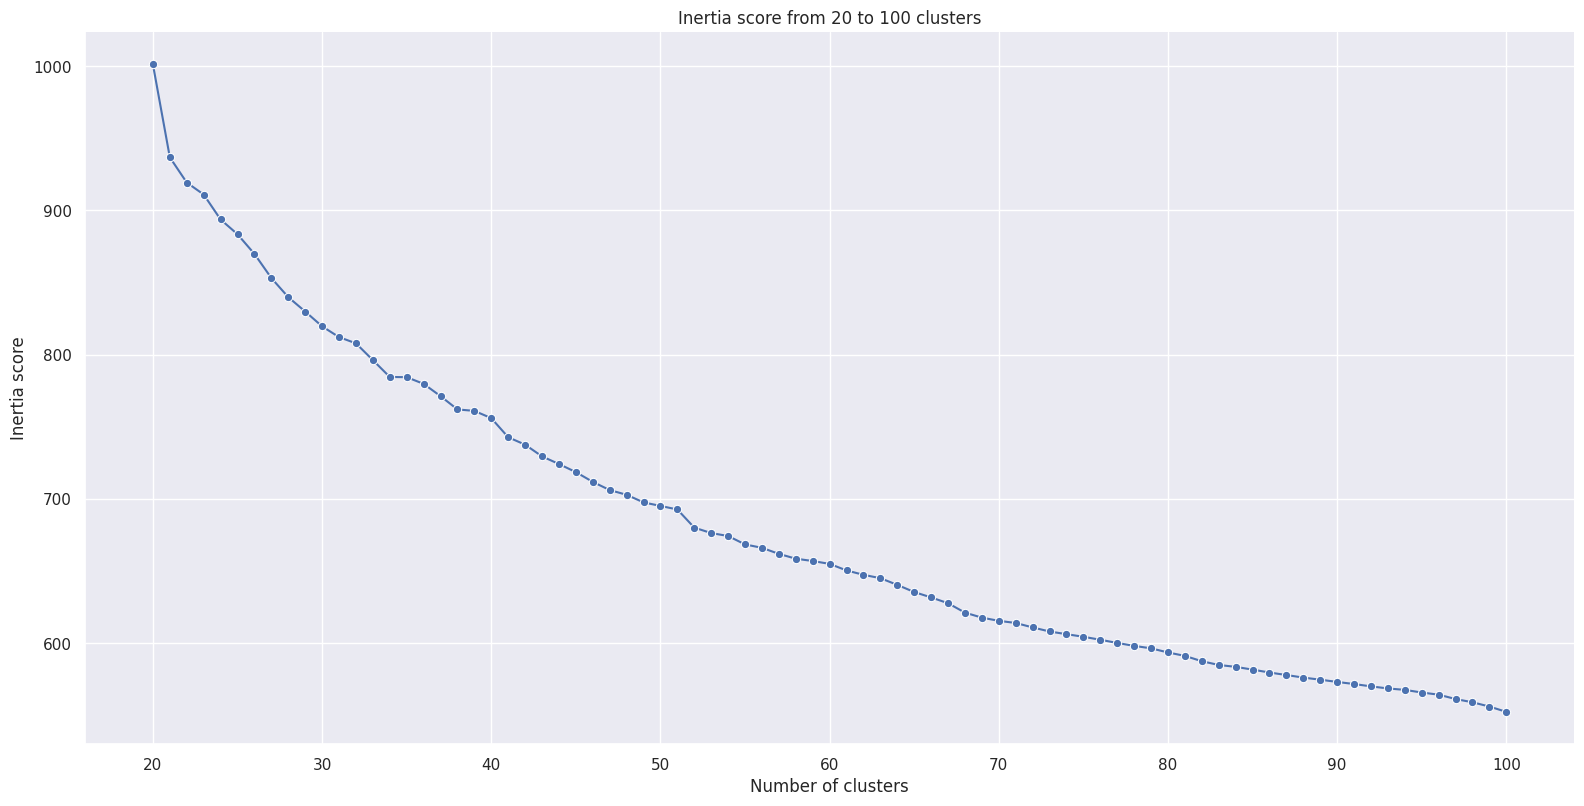

In [ ]:
sns.set_theme(style='darkgrid')# to see the graph better

(
# Create a line plot of the inertia scores
sns.relplot(y = inertia_list,
            x = range(20, max_k + 1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
# Set the title of the plot
.set(title=f"Inertia score from 20 to {max_k} clusters")
# Set the axis labels
.set_axis_labels("Number of clusters", "Inertia score")
);

In [ ]:
# using the naked eye it could either be 31 or the steeper point at 35.

### Silhoutte Score

In [ ]:
# Set the maximum number of clusters to try
max_k = 100 #same as first test

# Create an empty list to store the silhouette scores
sil_scores = []


for j in range(20, max_k+1): #stipuled by business requirements the 20

    # Create a KMeans object with the specified number of clusters
    myKMeans2 = KMeans(n_clusters = j,
                    n_init = "auto",
                    random_state = Random_seed)

    # Fit the KMeans model to the scaled data
    myKMeans2.fit(songs_final_df[to_scale])

    # Get the cluster labels
    labels = myKMeans2.labels_

    # Calculate the silhouette score
    score = silhouette_score(songs_final_df[to_scale], labels)

    # Append the silhouette score to the list
    sil_scores.append(score)

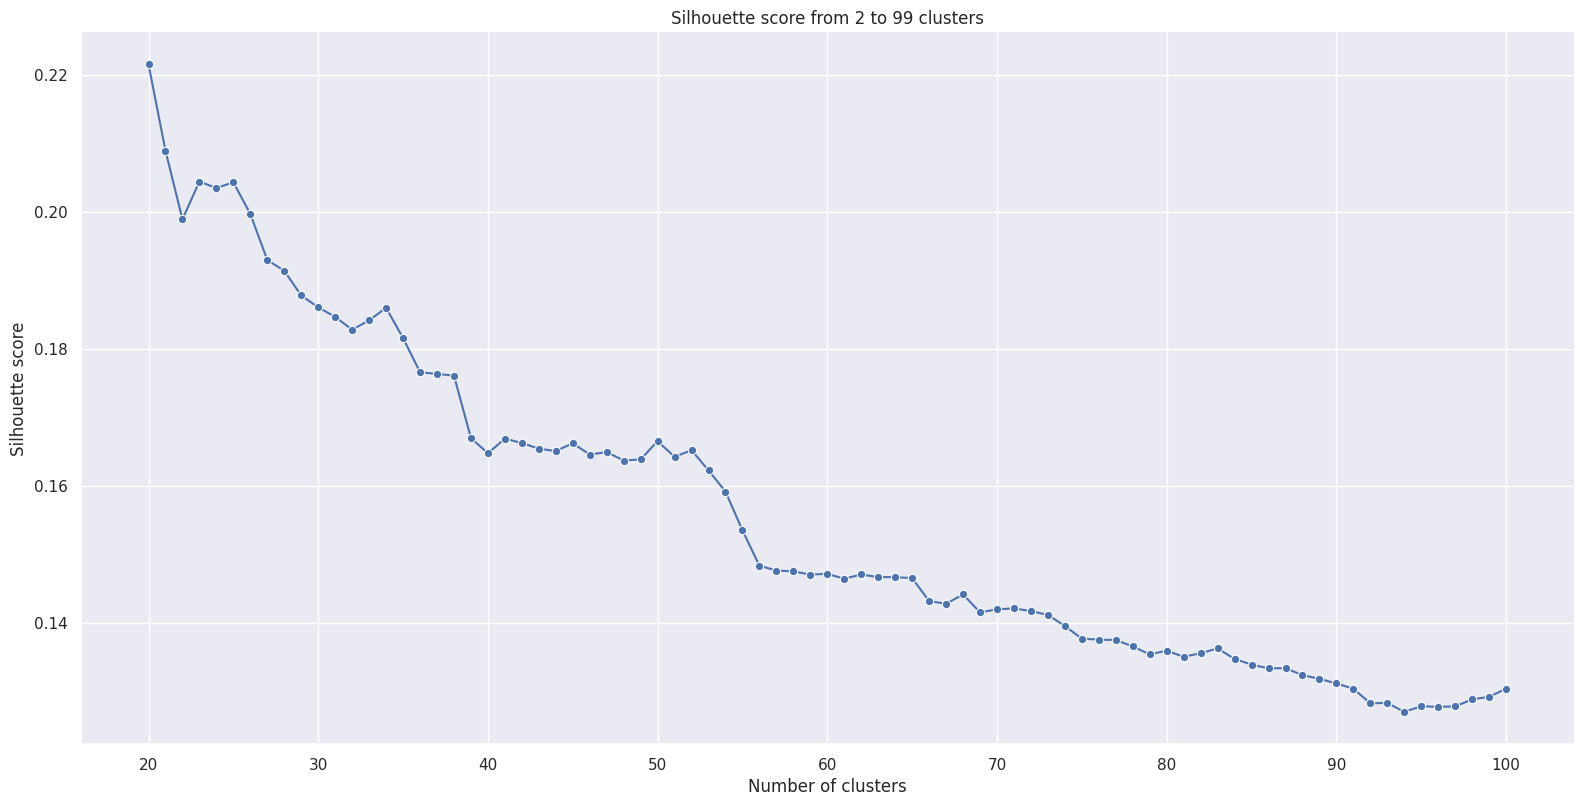

In [ ]:
(
sns.relplot(y = sil_scores,
            x = range(20, max_k+1),
            kind = 'line',
            marker = 'o',
            height = 8,
            aspect = 2)
.set(title=f"Silhouette score from 2 to {max_k - 1} clusters")
.set_axis_labels("Number of clusters", "Silhouette score")
);

### Tweaking suggested cluster amount by appling Business Analysis
I will use  35 cluster as a departure point but will consider additional business requirements i.e.
1. How long each playlist would be on average and whether this is acceptable from a customer perpective.
2. Whether the total playlists can generate sufficient business and therefore revenue for Moosaic.

In [ ]:
#Do 30 -35 playlists out of 5000 songs make sense?

In [ ]:
# function to eveluate how many songs will be in each playlist depending on the cluster amount
def songs_per_playlist(cluster_amount):
  return 5000/cluster_amount

In [ ]:
# average legnth of each track
average_minutes=(songs_5000['duration_ms '].mean())/60000
average_minutes #averagesong legnth is about 4 minutes

np.float64(4.13185282075772)

In [ ]:
def average_playlist(songs_per_playlist):
  return (songs_per_playlist * 4)/60

In [ ]:
songs_per_playlist(35)

142.85714285714286

In [ ]:
average_playlist(142.85) # 9 hours playlist seems too long

9.523333333333333

In [ ]:
songs_per_playlist(40)

125.0

In [ ]:
average_playlist(125) # 8 hours still long

8.333333333333334

In [ ]:
songs_per_playlist(50)

100.0

In [ ]:
average_playlist(100)# much better

6.666666666666667

In [ ]:
songs_per_playlist(65)

76.92307692307692

In [ ]:
average_playlist(77)# 5 hours seems good, long enough to create a mood and might also listen to it in time blocks

5.133333333333334

In [ ]:
# will settle on 65 clusters

## (Final) K- means clustering

In [ ]:
# Initialise the model
n_clusters = 65
myKMeans3 = KMeans(n_clusters=n_clusters,
                   n_init="auto",
                   random_state = Random_seed)

# Fit the model to the data
myKMeans3.fit(songs_final_df[to_scale])

# Obtain the cluster output
clusters = myKMeans3.labels_

# Attach the cluster output to our original DataFrame
songs_final_df["cluster"] = clusters

In [ ]:
songs_final_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,cluster
artist_song,,,,,,,,,,,,,,,,
Gilberto Gil Se Eu Quiser Falar Com Deus,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...,8
Antônio Carlos Jobim Saudade De Bahia,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...,11
"Martinho Da Vila Canta Canta, Minha Gente",0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...,17
Chico César Mulher Eu Sei,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...,56
Kurt Elling Rosa Morena,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Pyotr Ilyich Tchaikovsky 1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...,16
"Tristan Murail Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...,28
"Arnold Schoenberg Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...,6


In [ ]:
songs_final1_df=songs_final_df.sort_values(by="cluster")

In [ ]:
songs_final1_df.tail() # sanity check, sorted table and there are 65 clusters

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,cluster
artist_song,,,,,,,,,,,,,,,,
"Elton John Circle of Life - From ""The Lion King""/Soundtrack Version",0.310238,0.387,0.909091,0.728359,1.0,0.036057,0.265060,0.218274,0.107396,0.139086,0.750442,0.068421,0.8,5vKkaZHPzuqQheytfKuXzp,https://open.spotify.com/track/5vKkaZHPzuqQhey...,64
Eric Clapton Change the World - 2015 Remaster,0.743537,0.556,0.818182,0.835154,1.0,0.027015,0.478916,0.005188,0.094732,0.518782,0.452825,0.053410,0.8,5EVIK1ZxQF78Ryq4hiWj0F,https://open.spotify.com/track/5EVIK1ZxQF78Ryq...,64
Whitney Houston I Have Nothing - Film Version,0.502585,0.448,0.636364,0.829236,1.0,0.037255,0.760040,0.000000,0.086322,0.172589,0.714351,0.069595,0.6,76puoNshqjAAocKl5KbmpQ,https://open.spotify.com/track/76puoNshqjAAocK...,64
James Arthur Say You Won't Let Go,0.413650,0.564,0.909091,0.856770,1.0,0.056972,0.695783,0.000000,0.087437,0.490355,0.463896,0.047179,0.8,1Pw5C4N6Fn5E4mGCxmbbVa,https://open.spotify.com/track/1Pw5C4N6Fn5E4mG...,64
Robbie Williams She's The One,0.251293,0.609,0.909091,0.840354,1.0,0.035185,0.665663,0.000011,0.223911,0.338071,0.778859,0.059547,0.8,4lO57zZGFcj7vSY4QhfVDq,https://open.spotify.com/track/4lO57zZGFcj7vSY...,64


## Analysing the final playlists - Do they make sense?

### Using a Radar chart to examine whether the playlists are distinct

In [ ]:
scatter_objects = []

# State the label for each arm of the chart
categories = songs_final1_df.columns

# Iterate over the unique clusters and add an object for each cluster to the list
for cluster in sorted(songs_final1_df['cluster'].unique()):

  # Find the mean value for each column of the cluster
  cluster_means = [songs_final1_df.loc[songs_final1_df["cluster"] == cluster, songs_final1_df.columns[0]].mean(),
                  songs_final1_df.loc[songs_final1_df["cluster"] == cluster, songs_final1_df.columns[1]].mean(),
                  songs_final1_df.loc[songs_final1_df["cluster"] == cluster, songs_final1_df.columns[2]].mean(),
                  songs_final1_df.loc[songs_final1_df["cluster"] == cluster, songs_final1_df.columns[3]].mean(),
                  songs_final1_df.loc[songs_final1_df["cluster"] == cluster, songs_final1_df.columns[4]].mean(),
                  songs_final1_df.loc[songs_final1_df["cluster"] == cluster, songs_final1_df.columns[5]].mean(),
                  songs_final1_df.loc[songs_final1_df["cluster"] == cluster, songs_final1_df.columns[6]].mean(),
                  songs_final1_df.loc[songs_final1_df["cluster"] == cluster, songs_final1_df.columns[7]].mean(),
                  songs_final1_df.loc[songs_final1_df["cluster"] == cluster, songs_final1_df.columns[8]].mean(),
                  songs_final1_df.loc[songs_final1_df["cluster"] == cluster, songs_final1_df.columns[9]].mean()]
                  # Bonus: see if you can turn this code for `cluster_means` into a list comprehension

  # Create a Scatterpolar object for the cluster
  cluster_scatter = go.Scatterpolar(
    r = cluster_means, # set the radial coordinates
    theta = categories, # the names of the columns
    fill = 'toself', # fills in the space with colour
    name = f'Cluster {cluster}' # adds the name of the cluster
  )

  # Add the Scatterpolar object to the list
  scatter_objects.append(cluster_scatter)

# Create the figure (the white area)
fig = go.Figure()

# Add the scatter objects to the figure
fig.add_traces(scatter_objects)

# Add extras to the plot, such as title
fig.update_layout(
  title_text = 'Radar chart of mean music playlist',
  height = 600,
  width = 800,
  polar = dict(
    radialaxis = dict(
      visible = True, # visibility of the numbers on the arm
      range = [0, 1] # scale of the plot
    )),
  showlegend = True
)

# Show the initialised plot and the trace objects
fig.show()

In [ ]:
# Randomly selected cluster 0 and 64. They are different from each just by looking at this radar chart
# Cluster 29 and 1 are different but have overlap with mode, loudness  and almost overlap with speechiness and acousticness. Very curious to hear how they sound compared to each other

### Selecting two similar playlists and then manually listening to songs to examine whether they are indeed different

In [ ]:
cluster_29=songs_final1_df.loc[songs_final1_df["cluster"]==29]

In [ ]:
cluster_29

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,cluster
artist_song,,,,,,,,,,,,,,,,
Zlatko Großer Bruder - Single Mix,0.707342,0.965,0.000000,0.919924,1.0,0.074728,0.004880,0.000004,0.317123,0.965482,0.645170,0.046373,0.8,4Rx40k8wqRzxTiJTWKrbge,https://open.spotify.com/track/4Rx40k8wqRzxTiJ...,29
Clawfinger Biggest & The Best - Remastered version,0.569804,0.918,0.090909,0.893271,1.0,0.069935,0.015060,0.000631,0.094225,0.609137,0.796294,0.052593,0.8,4KdCtL3tO5osDoxtZR1aqg,https://open.spotify.com/track/4KdCtL3tO5osDox...,29
LaBrassBanda Nackert - Single Version,0.621510,0.797,0.090909,0.885609,1.0,0.032462,0.046386,0.013299,0.109422,0.556345,0.654526,0.046933,0.8,02dWbrwE3f89OLuPdttj53,https://open.spotify.com/track/02dWbrwE3f89OLu...,29
Luis Fonsi Despacito - Remix,0.675284,0.816,0.181818,0.907160,1.0,0.181917,0.228916,0.000000,0.097974,0.828426,0.832212,0.051828,0.8,6rPO02ozF3bM7NnOV4h6s2,https://open.spotify.com/track/6rPO02ozF3bM7Nn...,29
Hatebreed Looking Down the Barrel of Today,0.503619,0.987,0.090909,0.901340,1.0,0.088453,0.000654,0.051371,0.287741,0.506599,0.841465,0.034065,0.8,5hQfs9spSyXUavvPe7jmgn,https://open.spotify.com/track/5hQfs9spSyXUavv...,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Dua Lipa Physical,0.669080,0.844,0.000000,0.916892,1.0,0.049782,0.013755,0.000668,0.103343,0.757360,0.686770,0.042577,0.8,5px6upUHM3fhOP621Edp4V,https://open.spotify.com/track/5px6upUHM3fhOP6...,29
Taylor Swift ME! (feat. Brendon Urie of Panic! At The Disco),0.630817,0.830,0.000000,0.911203,1.0,0.062200,0.033133,0.000000,0.119554,0.739086,0.851264,0.042358,0.8,2Rk4JlNc2TPmZe2af99d45,https://open.spotify.com/track/2Rk4JlNc2TPmZe2...,29
Avicii Wake Me Up,0.550155,0.783,0.181818,0.885250,1.0,0.056972,0.003815,0.001218,0.163121,0.652792,0.579840,0.056745,0.8,0nrRP2bk19rLc0orkWPQk2,https://open.spotify.com/track/0nrRP2bk19rLc0o...,29


In [ ]:
cluster_1=songs_final1_df.loc[songs_final1_df["cluster"]==1]
cluster_1



,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html,cluster
artist_song,,,,,,,,,,,,,,,,
Mark Forster Kogong,0.681489,0.524,0.090909,0.820971,1.0,0.068519,0.178715,0.000702,0.132725,0.489340,0.607926,0.050411,0.8,0eBEo8ckRAmUEdrbmgpevQ,https://open.spotify.com/track/0eBEo8ckRAmUEdr...,1
Die Toten Hosen Wannsee,0.663909,0.536,0.000000,0.906068,1.0,0.046623,0.020281,0.000000,0.113475,0.397970,0.729230,0.040095,0.8,5KSzv6Ho2Xw1k61SpM3l5n,https://open.spotify.com/track/5KSzv6Ho2Xw1k61...,1
Max Giesinger Wenn sie tanzt,0.671148,0.710,0.000000,0.867676,1.0,0.042919,0.051104,0.000000,0.181358,0.355330,0.547026,0.047838,0.8,4mMYmlFkmrDStcSSpBKAE7,https://open.spotify.com/track/4mMYmlFkmrDStcS...,1
AnnenMayKantereit Oft gefragt,0.650465,0.736,0.272727,0.867432,1.0,0.053159,0.301205,0.000007,0.160081,0.315736,0.585359,0.038583,0.8,6J07Aeq7fOW5Xx9mFtwyoH,https://open.spotify.com/track/6J07Aeq7fOW5Xx9...,1
Marteria Lila Wolken,0.561531,0.676,0.090909,0.873284,1.0,0.057734,0.185743,0.000000,0.304965,0.168528,0.672401,0.051623,0.8,3CT1nhEnqol4rHIdwD7Rr7,https://open.spotify.com/track/3CT1nhEnqol4rHI...,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tasha Cobbs Leonard Royalty - Live,0.299897,0.534,0.000000,0.868524,1.0,0.055338,0.185743,0.000000,0.114488,0.225381,0.796000,0.101452,0.6,54YoeR102h0FEnAbRDe3n0,https://open.spotify.com/track/54YoeR102h0FEnA...,1
Jonathan Traylor Lifted,0.616339,0.852,0.181818,0.857928,1.0,0.048584,0.009578,0.000109,0.227964,0.505584,0.686373,0.065851,0.8,0L7sIDOLgR5COZ0iCncKNb,https://open.spotify.com/track/0L7sIDOLgR5COZ0...,1
Kanye West Follow God,0.547053,0.900,0.090909,0.921017,1.0,0.455338,0.000249,0.000012,0.043161,0.440609,0.842521,0.018988,0.8,2QpGZOhTCHHiKmpSO9FW4h,https://open.spotify.com/track/2QpGZOhTCHHiKmp...,1


### Observations after listening to both playlists

I agree with the radar graph, almost everything. I think cluster 1 is a little random there is lil john get low and Bryan Adams, so the generated clusters did not account for musical genere. However, 5 hours is a long playlist and if the transitions between songs is well executed. It could be considered one mood.

## Generating playlists using Principal Component Analysis(PCA) and K-means clustering

### Preparing the Data

In [ ]:
songs_pca_df= songs_final_df.copy()

In [ ]:
#remove the cluster label, because actually this is just a column that I put inside the table using Kmeans labels
songs_pca_df = songs_pca_df.drop(columns=['cluster'])
songs_pca_df # okay we have scaled data to work with

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,id,html
artist_song,,,,,,,,,,,,,,,
Gilberto Gil Se Eu Quiser Falar Com Deus,0.680455,0.25900,1.000000,0.763897,0.0,0.076797,0.696787,0.000060,0.987842,0.310660,0.515800,0.059067,0.8,1n7JnwviZ7zf0LR1tcGFq7,https://open.spotify.com/track/1n7JnwviZ7zf0LR...
Antônio Carlos Jobim Saudade De Bahia,0.767322,0.39900,0.181818,0.771967,1.0,0.037691,0.217871,0.000002,0.108409,0.703553,0.584322,0.042058,0.8,5QGM1U0eCYrQuwSJwTm5Zq,https://open.spotify.com/track/5QGM1U0eCYrQuwS...
"Martinho Da Vila Canta Canta, Minha Gente",0.880041,0.73000,0.181818,0.798018,1.0,0.377996,0.454819,0.000064,0.125633,0.918782,0.437862,0.031590,0.8,0NLIFSZxPzQhCwnkn5PJYs,https://open.spotify.com/track/0NLIFSZxPzQhCwn...
Chico César Mulher Eu Sei,0.729059,0.05020,0.363636,0.682811,1.0,0.051307,0.882530,0.000041,0.391084,0.531980,0.499098,0.040567,0.8,3mXqOdlLE1k67WsAxryPFs,https://open.spotify.com/track/3mXqOdlLE1k67Ws...
Kurt Elling Rosa Morena,0.673216,0.11900,0.545455,0.655228,1.0,0.041394,0.919679,0.000348,0.105370,0.408122,0.565171,0.063684,0.8,7bSzjzjTkWT2CkIPPdp0eA,https://open.spotify.com/track/7bSzjzjTkWT2CkI...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Pyotr Ilyich Tchaikovsky 1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",0.208893,0.06940,0.272727,0.596818,1.0,0.051525,0.920683,0.725888,0.084296,0.066497,0.410795,0.254357,0.8,1aEhYlZtypmipA06SDJ4U3,https://open.spotify.com/track/1aEhYlZtypmipA0...
"Tristan Murail Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.194416,0.10100,0.545455,0.621548,1.0,0.048148,0.858434,0.432487,0.070314,0.036041,0.388495,0.217350,0.8,1Gfqe7TAKklmuZf6hxsH6h,https://open.spotify.com/track/1Gfqe7TAKklmuZf...
"Arnold Schoenberg Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",0.061634,0.00093,0.818182,0.277803,1.0,0.047277,0.954819,0.983756,0.078217,0.034924,0.334469,0.054302,0.6,2XNwnFrdMDpismp0VUZ7cU,https://open.spotify.com/track/2XNwnFrdMDpismp...


### Conducting PCA

In [ ]:
# Initialise the PCA object
pca = PCA()
# Fit the PCA object to the data
pca.fit(songs_pca_df[to_scale])

PCA()

In [ ]:
# Transform scaled_features_df based on the fit calculations
songs_pca1_df = pca.transform(songs_pca_df[to_scale])
songs_pca1_df #done

,pca0,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12
artist_song,,,,,,,,,,,,,
Gilberto Gil Se Eu Quiser Falar Com Deus,-0.094419,-0.757884,0.504083,0.438636,-0.257086,0.554242,0.560851,0.197453,-0.102738,0.022729,-0.013079,0.005804,-0.006255
Antônio Carlos Jobim Saudade De Bahia,-0.017481,0.453019,0.384560,-0.225555,0.082847,-0.174383,0.038690,0.109702,-0.174917,0.011962,-0.017243,-0.015519,-0.011982
"Martinho Da Vila Canta Canta, Minha Gente",-0.126719,0.504107,0.471724,-0.230476,0.276667,-0.007994,0.037417,-0.139534,0.165436,-0.016899,0.289205,-0.069875,-0.010251
Chico César Mulher Eu Sei,0.505367,0.184282,0.811681,-0.006984,-0.074671,0.106656,0.223721,0.101924,-0.086820,0.029381,0.008400,-0.013775,-0.021077
Kurt Elling Rosa Morena,0.542908,0.131782,0.744387,0.172948,-0.151485,-0.082936,0.009560,0.093759,0.027305,0.032008,-0.005094,-0.063066,0.002000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Pyotr Ilyich Tchaikovsky 1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1.177483,-0.113871,0.123871,-0.106151,-0.116104,-0.081500,0.002337,-0.068789,-0.079293,0.077375,0.018366,-0.012382,0.173650
"Tristan Murail Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.974406,-0.069205,0.211216,0.173331,-0.305723,-0.099305,-0.023697,-0.105861,-0.101755,0.077026,0.011342,-0.012386,0.137500
"Arnold Schoenberg Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",1.400419,-0.327087,-0.021031,0.424738,0.000413,-0.089724,-0.013262,-0.144308,-0.239323,-0.108310,0.059216,-0.248719,-0.038534


In [ ]:
# Get the variance explained by each principal component
explained_variance_array = pca.explained_variance_ratio_
explained_variance_array # to my naked eye, seems after PCA 4 the marginal gain decreases

array([0.27948434, 0.26165474, 0.18337196, 0.11435786, 0.06083028,
       0.0276579 , 0.0226709 , 0.01778696, 0.01492237, 0.0073763 ,
       0.00603544, 0.00251644, 0.00133449])

### Leveraging Elbow Method to find optimal PCA number

In [ ]:
pd.DataFrame(explained_variance_array, columns=["Variance explained"])

,Variance explained
0,0.279484
1,0.261655
2,0.183372
3,0.114358
4,0.060830
5,0.027658
6,0.022671
7,0.017787
8,0.014922
9,0.007376


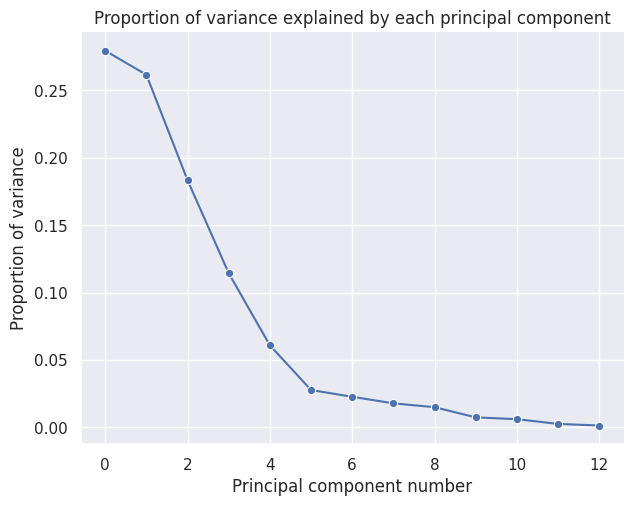

In [ ]:
#Create a Pandas DataFrame from the variance explained array
explained_variance_array_df = pd.DataFrame(explained_variance_array, columns=["Variance explained"])

(
  # Create a line chart with sns.relplot
  sns.relplot(
      kind = 'line',
      data = explained_variance_array_df,
      x = explained_variance_array_df.index,
      y = "Variance explained",
      marker = 'o',
      aspect = 1.3)
  # Set the title of the plot
  .set(title = "Proportion of variance explained by each principal component")
  # Set the axis labels
  .set_axis_labels("Principal component number", "Proportion of variance")
);

In [ ]:
 #looks like 5 is the inertia point

In [ ]:
elbow= 5

In [ ]:
pca_elbow = PCA(n_components = elbow + 1)

In [ ]:
pca_elbow_df = pca_elbow.fit_transform(songs_pca1_df)

In [ ]:
pca_elbow_df

,pca0,pca1,pca2,pca3,pca4,pca5
artist_song,,,,,,
Gilberto Gil Se Eu Quiser Falar Com Deus,-0.094419,-0.757884,0.504083,0.438636,-0.257086,0.554242
Antônio Carlos Jobim Saudade De Bahia,-0.017481,0.453019,0.384560,-0.225555,0.082847,-0.174383
"Martinho Da Vila Canta Canta, Minha Gente",-0.126719,0.504107,0.471724,-0.230476,0.276667,-0.007994
Chico César Mulher Eu Sei,0.505367,0.184282,0.811681,-0.006984,-0.074671,0.106656
Kurt Elling Rosa Morena,0.542908,0.131782,0.744387,0.172948,-0.151485,-0.082936
...,...,...,...,...,...,...
"Pyotr Ilyich Tchaikovsky 1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1.177483,-0.113871,0.123871,-0.106151,-0.116104,-0.081500
"Tristan Murail Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.974406,-0.069205,0.211216,0.173331,-0.305723,-0.099305
"Arnold Schoenberg Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",1.400419,-0.327087,-0.021031,0.424738,0.000413,-0.089724


### Leveraging cummuliative explained variance to find optimal PCA number

In [ ]:
cumulative_sum_of_variance = np.cumsum(explained_variance_array)
cumulative_sum_of_variance

array([0.27948434, 0.54113908, 0.72451104, 0.8388689 , 0.89969919,
       0.92735709, 0.95002799, 0.96781495, 0.98273732, 0.99011362,
       0.99614906, 0.99866551, 1.        ])

In [ ]:
# Create a PCA object
pca_variance = PCA(n_components = 0.95)

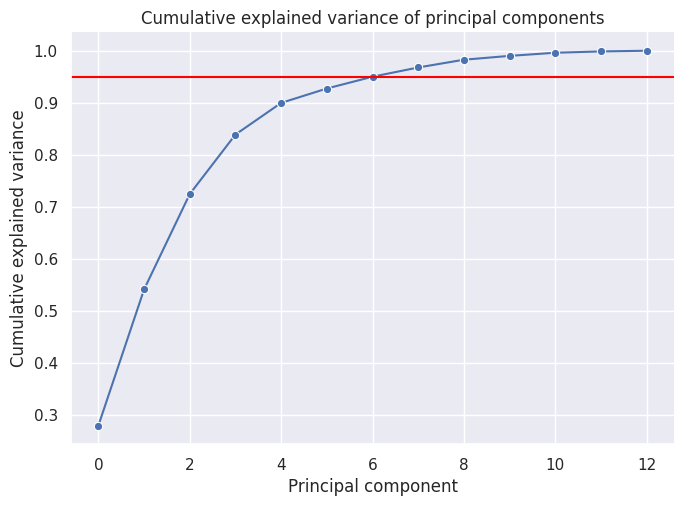

In [ ]:
(
  # Create a cumulative explained variance plot
  sns.relplot(
      kind = "line",  # Create a line plot
      x = range(len(explained_variance_array)),  # Set the x-axis to be the principal component index
      y = cumulative_sum_of_variance,  # Set the y-axis to be the cumulative explained variance
      marker = "o",  # Use a circle marker for the data points
      aspect = 1.4,  # Set the aspect ratio of the plot to be 1.4
  )
  # Set the title of the plot
  .set(title="Cumulative explained variance of principal components")
  # Set the axis labels
  .set_axis_labels("Principal component", "Cumulative explained variance")
);

# Add a horizontal red line at 0.95 on the y axis
plt.axhline(y = 0.95,
            color = 'red'); # here is clearly 6

In [ ]:
# This analysis shows that 6 is the optimal PCA amount. This is normal as both elbow method and CEV analysis are estimations rather than 100% correct

### Applying K-means clustering to PCA data

In [ ]:
# Initialise the model
n_clusters = 65
pcakmeans = KMeans(n_clusters=n_clusters,
                   n_init="auto",
                   random_state = Random_seed)

# Fit the model to the data
pcakmeans.fit(pca_elbow_df)

# Obtain the cluster output
clusters2 = pcakmeans.labels_

# Attach the cluster output to our original DataFrame
pca_elbow_df["cluster"] = clusters2

In [ ]:
pca_elbow_df

,pca0,pca1,pca2,pca3,pca4,pca5,cluster
artist_song,,,,,,,
Gilberto Gil Se Eu Quiser Falar Com Deus,-0.094419,-0.757884,0.504083,0.438636,-0.257086,0.554242,23
Antônio Carlos Jobim Saudade De Bahia,-0.017481,0.453019,0.384560,-0.225555,0.082847,-0.174383,3
"Martinho Da Vila Canta Canta, Minha Gente",-0.126719,0.504107,0.471724,-0.230476,0.276667,-0.007994,3
Chico César Mulher Eu Sei,0.505367,0.184282,0.811681,-0.006984,-0.074671,0.106656,22
Kurt Elling Rosa Morena,0.542908,0.131782,0.744387,0.172948,-0.151485,-0.082936,61
...,...,...,...,...,...,...,...
"Pyotr Ilyich Tchaikovsky 1812 Festival Overture, Op. 49: 1812 Overture, Op. 49",1.177483,-0.113871,0.123871,-0.106151,-0.116104,-0.081500,29
"Tristan Murail Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique",0.974406,-0.069205,0.211216,0.173331,-0.305723,-0.099305,52
"Arnold Schoenberg Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours)",1.400419,-0.327087,-0.021031,0.424738,0.000413,-0.089724,55


In [ ]:
pca_elbow_df= pca_elbow_df.sort_values(by="cluster")
pca_elbow_df

,pca0,pca1,pca2,pca3,pca4,pca5,cluster
artist_song,,,,,,,
"Karol Szymanowski Symphony No. 3 - ""Chant de la nuit"", Op. 27: Largo...",0.644467,0.073807,0.222666,0.273828,-0.558412,0.003700,0
Luciano Berio Sinfonia: III. In ruhig fliessender Bewegung,0.697352,0.045704,0.354995,0.270562,-0.361043,0.201384,0
"Anton Webern Symphony, Op. 21: I. Ruhig schreitend",0.898329,-0.058963,0.478001,0.381668,-0.571279,0.354595,0
Toots Thielemans Coracao Vagabundo,0.724178,0.003285,0.556453,0.354251,-0.258671,-0.207168,0
Chico César Á Primeira Vista,0.462974,0.072035,0.531940,0.627890,-0.305995,0.327658,0
...,...,...,...,...,...,...,...
ZAYN Dusk Till Dawn - Radio Edit,-0.301793,-0.657493,-0.084377,0.417106,-0.479349,-0.093047,64
M.I.A. BORN FREE,-0.556960,-0.528990,-0.240457,0.313849,-0.360538,-0.045432,64
Napalm Death Mind Snare,-0.411834,-0.591777,-0.288678,0.304268,-0.160092,0.018747,64


### Analysing new playlists- Do they make sense?

In [ ]:
pca_29=pca_elbow_df.loc[pca_elbow_df["cluster"]==29]
pca_29


,pca0,pca1,pca2,pca3,pca4,pca5,cluster
artist_song,,,,,,,
Biosphere Hyperborea,1.056091,-0.067818,-0.049723,-0.127228,0.050026,-0.136045,29
"Jean Sibelius 6 Impromptus, Op. 5: Impromptu VI",1.298125,-0.200313,0.190115,-0.024374,0.053738,-0.224466,29
Emeralds Goes By,1.005950,-0.060257,-0.263380,-0.042080,0.100972,0.060981,29
Emily A. Sprague A Lake,1.164335,-0.112426,-0.087013,-0.116429,-0.030802,0.021583,29
GAS Pop 1,1.208268,-0.159008,0.091213,0.053225,0.252961,0.042208,29
...,...,...,...,...,...,...,...
George Gershwin An American in Paris,1.151768,-0.141964,-0.022916,0.063184,0.013598,0.089783,29
"Ludwig van Beethoven Beethoven: Symphony No. 3 in E-Flat Major, Op. 55 ""Eroica"": I. Allegro con brio",1.193384,-0.123776,0.130716,-0.110326,-0.000511,0.086086,29
"Nikolai Rimsky-Korsakov Scheherazade, Op.35: The Sea and Sinbad's Ship",1.181800,-0.137037,-0.031343,-0.021831,-0.070446,0.082359,29


In [ ]:
pca_0=pca_elbow_df.loc[pca_elbow_df["cluster"]==0]
pca_0

,pca0,pca1,pca2,pca3,pca4,pca5,cluster
artist_song,,,,,,,
"Karol Szymanowski Symphony No. 3 - ""Chant de la nuit"", Op. 27: Largo...",0.644467,0.073807,0.222666,0.273828,-0.558412,0.003700,0
Luciano Berio Sinfonia: III. In ruhig fliessender Bewegung,0.697352,0.045704,0.354995,0.270562,-0.361043,0.201384,0
"Anton Webern Symphony, Op. 21: I. Ruhig schreitend",0.898329,-0.058963,0.478001,0.381668,-0.571279,0.354595,0
Toots Thielemans Coracao Vagabundo,0.724178,0.003285,0.556453,0.354251,-0.258671,-0.207168,0
Chico César Á Primeira Vista,0.462974,0.072035,0.531940,0.627890,-0.305995,0.327658,0
"Giacomo Puccini Gianni Schicchi: ""O mio babbino caro""",0.894860,-0.068875,0.265238,0.359984,-0.301197,0.472788,0
"Giuseppe Verdi La Traviata / Act 1: ""Libiamo ne'lieti calici""",0.562819,0.053327,0.576263,0.545171,-0.318883,0.456969,0
"Wolfgang Amadeus Mozart Don Giovanni, ossia Il dissoluto punito, K.527 / Act 1: ""Là ci darem la mano""",0.703977,0.013716,0.599301,0.463875,-0.373689,0.501151,0
"Wolfgang Amadeus Mozart Le nozze di Figaro, K. 492 / Act 3: ""Sull’aria ... Che soave zeffiretto""",0.776159,-0.039156,0.554956,0.556005,-0.505025,0.209840,0


In [ ]:
pca_1=pca_elbow_df.loc[pca_elbow_df["cluster"]==1]
pca_1

,pca0,pca1,pca2,pca3,pca4,pca5,cluster
artist_song,,,,,,,
Desultory Left Behind,0.000907,0.274557,-0.475323,0.559969,0.066949,0.094714,1
Gojira L'enfant sauvage,0.127802,0.267846,-0.679987,0.306864,-0.252145,0.155970,1
Possessed Confessions,0.122343,0.289686,-0.608469,0.214464,-0.154107,0.223403,1
Fleshcrawl Never to Die Again,0.197070,0.276182,-0.472962,0.121563,-0.084517,-0.103353,1
Therion Asphyxiate with Fear,0.139275,0.280771,-0.607027,0.212562,-0.172573,0.005303,1
...,...,...,...,...,...,...,...
Cancer Blood Bath,0.011802,0.305363,-0.479691,0.387971,-0.100038,-0.105890,1
Gorguts Earthly Love,0.028526,0.297475,-0.612576,0.401187,-0.348208,0.137944,1
Vomitory The Voyage,0.062954,0.313121,-0.607008,0.216400,-0.262050,0.000378,1


In [ ]:
pca_elbow_df['cluster'].value_counts() #songs per playlist using PCA

,count
cluster,
34,164
11,156
50,154
57,144
25,141
...,...
54,34
12,33
44,32


In [ ]:
songs_final1_df['cluster']. value_counts() #songs per playlist using K-means

,count
cluster,
1,185
33,168
53,163
14,155
6,142
...,...
42,32
47,32
49,28


###  Observations on PCA generated playlists
Actually I impressed with the final playlists. Some playlists are much longer/shorter than others which might lead to packaging issues but overall for the few that I listened to they seem like a much less random clustering and distinct from each other. Having said that, the new playlists where the PCA methodology was applied are not that much better then the playlists where PCA was not leveraged. For this dataset PCA is a nice add on but not neccissary to create K-means clustered playlists.

# Final Takeaway

K-means clustering to create playlists presents advantages and disadvantages. Namely:

**Pros:**

* Quick , simple  and scalable way to create playlists
* The generated playlists are distinct and do not completely overlap

**Cons:**

* Does not account for qualitative features of types of songs such as “genre” which some customers might also associate with mood
* The generated playlists vary in number of songs and legnth which may lead to packaging and pricing issues.
* The model still requires  human intevention for quality asssurance.

**Conclusion**

Unsupervised machine learning, particularly K-means clustering can be useful as a first step to generate playlists. However, to enhance quality and market relevance music and marketing experts should refine and curate the final playlists.
